# Main AImon5.0 monitoring pipeline
This notebook demonstrates how to run the AImon monitoring pipeline on example point cloud data from Trier, Germany. It covers the detection of changes between two epochs and visualizing detected change events on projected image of the study site. Configuration and data files are provided to generate the visual output to help interpret the results.

**Input:**  
- Configuration file: `./test_data/trier_configuration.json`  
- Two epochs (point cloud files): `./test_data/240826_000005.laz`, `./test_data/240826_010006.laz`

**Output:**  
- Projected range image: `./test_data/out/Trier_vs6_av0_999/03_Change_visualisation_UHD_Projected_Images/Trier_vs6_av0_999_RangeImage.tif`


## Importing functions

In [1]:
# Imports
import os
from aimon import run_pipeline
from aimon import utilities
# Set current directory to the location of the notebook (works even if __file__ is not defined)
try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()

current_dir = os.path.dirname(current_dir)
os.chdir(current_dir)

## Running the main pipeline with two epochs

In [2]:
# Define parameters
# You may replace the test files with your own configuration and point cloud files
config_file = "./test_data/trier_configuration.json"
laz_file_t0 = "./test_data/240826_000005.laz"
laz_file_t1 = "./test_data/240826_010006.laz"

# Run in standard mode
run_pipeline(
    config_file=config_file,
    filenames=[laz_file_t0,laz_file_t1]
)

Finished                                                                        


## Visualizing the change events

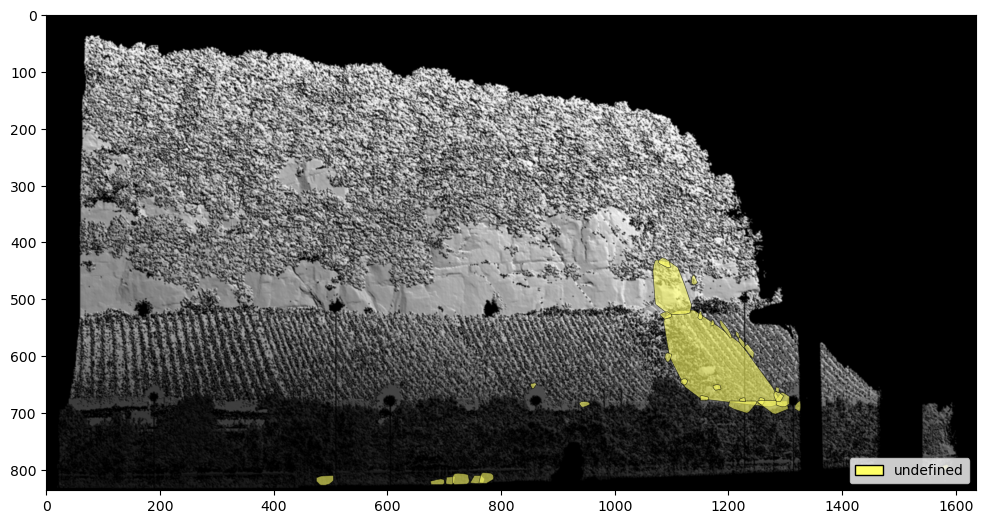

In [3]:
## Project detected change events
img_path = "./test_data/out/Trier_vs6_av0_999/03_Change_visualisation_UHD_Projected_Images/Trier_vs6_av0_999_RangeImage.tif"
change_event_file = "./test_data/out/Trier_vs6_av0_999/04_Change_visualisation_UHD_Change_Events/Trier_vs6_av0_999_change_events_pixel.geojson"

utilities.plot_change_events(change_event_file, img_path, 'event_type')